# Text Detection using Keras-OCR
- https://pypi.org/project/keras-ocr/

## ติดตั้งโปรแกรม

### ติดตั้งโปรแกรม keras-ocr

In [1]:
! pip install keras-ocr

     |████████████████████████████████| 9.5MB 4.9MB/s 


### ติดตั้งโปรแกรม cairocffi

In [5]:
! pip install cairocffi

## การใช้งานโปรแกรม keras-ocr

### สร้างตัว detection และอ่านรูปภาพด้วยเครื่องมือของ keras_ocr

Looking for /root/.keras-ocr/craft_mlt_25k.h5


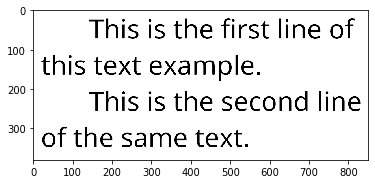

In [20]:
import matplotlib.pyplot as plt
import keras_ocr

detector = keras_ocr.detection.Detector(pretrained=True)
image = keras_ocr.tools.read('line-indent.png')

plt.imshow(image)
plt.show()

### คัดลอกรูปภาพ เพื่อใช้สำหรับวาดกรอบสี่เหลี่ยม

In [0]:
import numpy as np

# copy array
text_img = np.array(image, copy=True)

### ค้นหาบริเวณตัวอักษร
ค้นหาบริเวณที่เป็นตัวอักษร และแสดงจำนวนของบริเวณที่ค้นพบทั้งหมด

In [21]:
# Boxes will be an Nx4x2 array of box quadrangles
# where N is the number of detected text boxes.
boxes = detector.detect(images=[image])[0]

len(boxes)

18

### แสดงค่า x, y ของแต่ละบริเวณ

In [10]:
boxes[0]

array([[474.58502 ,  17.081757],
       [609.6322  ,  22.377724],
       [607.2537  ,  83.02955 ],
       [472.2065  ,  77.73358 ]], dtype=float32)

### แสดงวิธีการเข้าถึงข้อมูล

In [38]:
print(int(boxes[0][0][0]))
print(int(boxes[0][0][1]))
print(int(boxes[0][1][0]))
print(int(boxes[0][1][1]))

print()
print(int(boxes[0][2][0]))
print(int(boxes[0][2][1]))
print(int(boxes[0][3][0]))
print(int(boxes[0][3][1]))

474
17
609
22

607
83
472
77


### แสดงการวาดกรอบสี่เหลี่ยมรอบบริเวณตัวอักษร

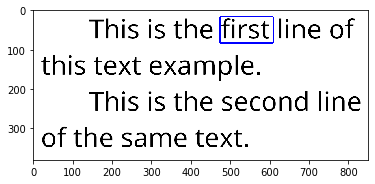

In [42]:
text_img = np.array(image, copy=True)
x = int(boxes[0][0][0])
y = int(boxes[0][0][1])
w = int(boxes[0][1][0]) - int(boxes[0][0][0])
h = int(boxes[0][2][1]) - int(boxes[0][0][1])
cv2.rectangle(text_img,(x,y),(x+w,y+h),(0,0,255),2)

plt.imshow(text_img)
plt.show()

## โปรแกมค้นหาตัวอักษร (Text Detection) 

Looking for /root/.keras-ocr/craft_mlt_25k.h5


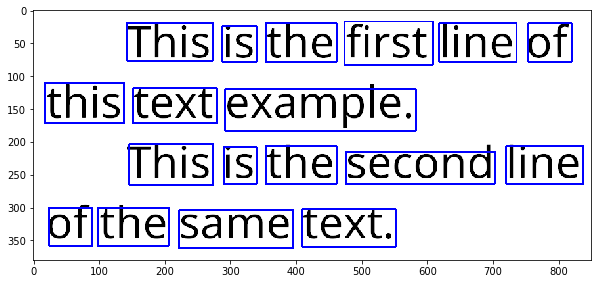

In [51]:
import matplotlib.pyplot as plt
import keras_ocr

detector = keras_ocr.detection.Detector(pretrained=True)
image = keras_ocr.tools.read('line-indent.png')
boxes = detector.detect(images=[image])[0]

text_img = np.array(image, copy=True)

for b in boxes:
  x = int(b[0][0])
  y = int(b[0][1])
  w = int(b[1][0]) - int(b[0][0])
  h = int(b[2][1]) - int(b[0][1])
  cv2.rectangle(text_img,(x,y),(x+w,y+h),(0,0,255),2)

plt.figure(figsize=(10,5))
plt.imshow(text_img)
plt.show()

### โปรแกรมค้นหาตัวอักษร เพิ่มเติม

Looking for /root/.keras-ocr/craft_mlt_25k.h5


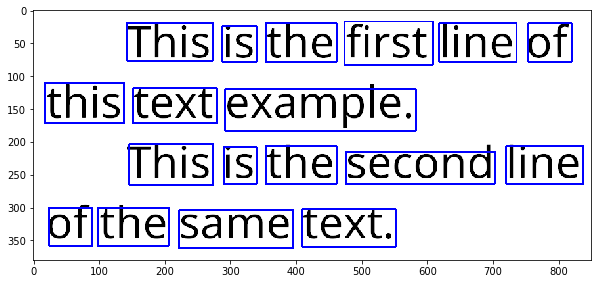

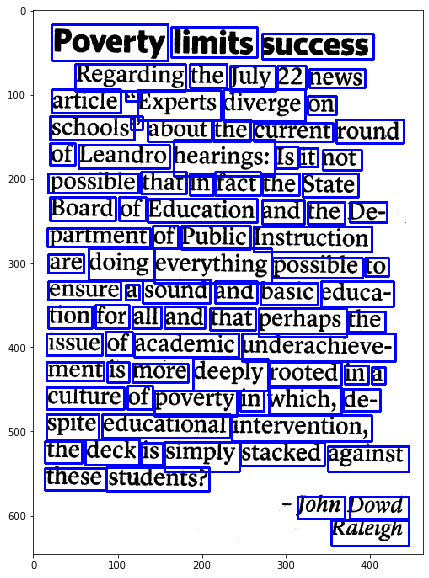

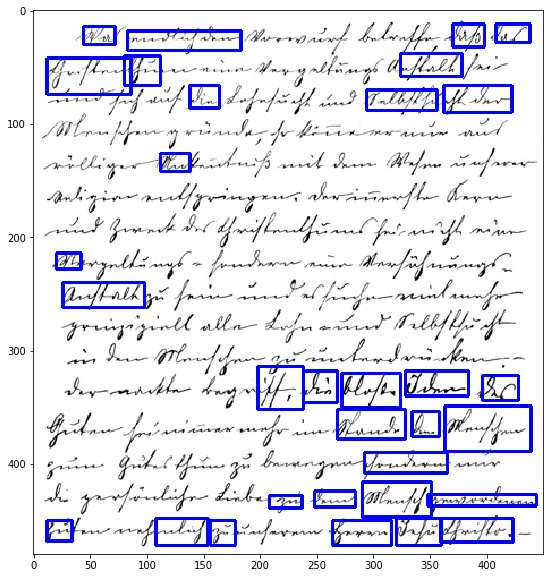

In [54]:
import matplotlib.pyplot as plt
import keras_ocr

img_paths = ['line-indent.png', '402_one_sentence_letter.png','150-logo-background-text-1.jpeg']

detector = keras_ocr.detection.Detector(pretrained=True)

for img_path in img_paths:
  image = keras_ocr.tools.read(img_path)
  text_img = np.array(image, copy=True)

  boxes = detector.detect(images=[image])[0]
  for b in boxes:
    x = int(b[0][0])
    y = int(b[0][1])
    w = int(b[1][0]) - int(b[0][0])
    h = int(b[2][1]) - int(b[0][1])
    cv2.rectangle(text_img,(x,y),(x+w,y+h),(0,0,255),2)
    
  plt.figure(figsize=(10,10))
  plt.imshow(text_img)
  plt.show()